<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/title.png' width=500/></center>

<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/practice.png' width=300/></center>

# 실습 목표

- 데이터프레임을 연결할 수 있습니다.
- 데이터프레임을 조인할 수 있습니다.
- Rolling, Shift 기능을 활용할 수 있습니다.

# P6. [실습] 데이터프레임 변경(3)

## [실습1] 데이터프레임 연결

In [ ]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_format='retina'

In [ ]:
# 서울 인구 데이터 읽어오기
file_path = 'https://raw.githubusercontent.com/Jangrae/csv/master/seoul_pop01.csv'
spop01 = pd.read_csv(file_path, index_col = 'year') 
spop01.index.name = None
spop01.index = spop01.index.astype(str)

# 확인
spop01

,male,female
1995,533,527
1996,526,521
1997,521,517
1998,517,515
1999,517,515
2000,520,518
2001,518,516
2002,514,514
2003,513,514
2004,513,516


In [ ]:
# 서울 한국인 인구 데이터 읽어오기
file_path = 'https://raw.githubusercontent.com/Jangrae/csv/master/seoul_pop02.csv'
spop02 = pd.read_csv(file_path, index_col = 'year') 
spop02.index.name = None
spop02.index = spop02.index.astype(str)

# 확인
spop02

,male,female
2000,517,514
2001,514,512
2002,511,510
2003,508,509
2004,507,510
2005,506,510
2006,506,512
2007,506,513
2008,506,514
2009,506,515


In [ ]:
# 서울 외국인 인구 데이터 읽어오기
file_path = 'https://raw.githubusercontent.com/Jangrae/csv/master/seoul_pop03.csv'
spop03 = pd.read_csv(file_path, index_col = 'year') 
spop03.index.name = None
spop03.index = spop03.index.astype(str)

# 확인
spop03

,male,female
2000,3,3
2001,3,3
2002,4,4
2003,5,5
2004,5,6
2005,6,7
2006,8,9
2007,11,12
2008,12,13
2009,12,13


1) 다음과 같이 spop02, spop03 데이터프레임 열 이름을 변경하세요.

- spop02: k_male, k_female
- spop03: f_male, f_female

In [ ]:
# spop02 열 이름 변경
spop02.columns = ['k_male', 'k_female']

# 확인
spop02

,k_male,k_female
2000,517,514
2001,514,512
2002,511,510
2003,508,509
2004,507,510
2005,506,510
2006,506,512
2007,506,513
2008,506,514
2009,506,515


In [ ]:
# spop03 열 이름 변경
spop03.columns = ['f_male', 'f_female']

# 확인
spop03

,f_male,f_female
2000,3,3
2001,3,3
2002,4,4
2003,5,5
2004,5,6
2005,6,7
2006,8,9
2007,11,12
2008,12,13
2009,12,13


2) spop01, spop02, spop03 데이터프레임을 inner 방식으로 가로로 연결하여 spop  데이터프레임을 만드세요.

- 이 결과로 spop 데이터프레임은 male, female, k_male, k_female, f_male, f_female 열을 갖습니다.

In [ ]:
# 데이터베이스 연결
spop = pd.concat([spop01, spop02, spop03], axis=1, join='inner')

# 확인
spop

,male,female,k_male,k_female,f_male,f_female
2000,520,518,517,514,3,3
2001,518,516,514,512,3,3
2002,514,514,511,510,4,4
2003,513,514,508,509,5,5
2004,513,516,507,510,5,6
2005,512,517,506,510,6,7
2006,515,521,506,512,8,9
2007,517,525,506,513,11,12
2008,518,527,506,514,12,13
2009,518,528,506,515,12,13


3) 아래 구문을 각각 실행하여 서울 인구 변화를 확인하세요.
- x축은 지정하지 않았으므로 연도를 갖는 인덱스가 자동으로 x 측이 됩니다.

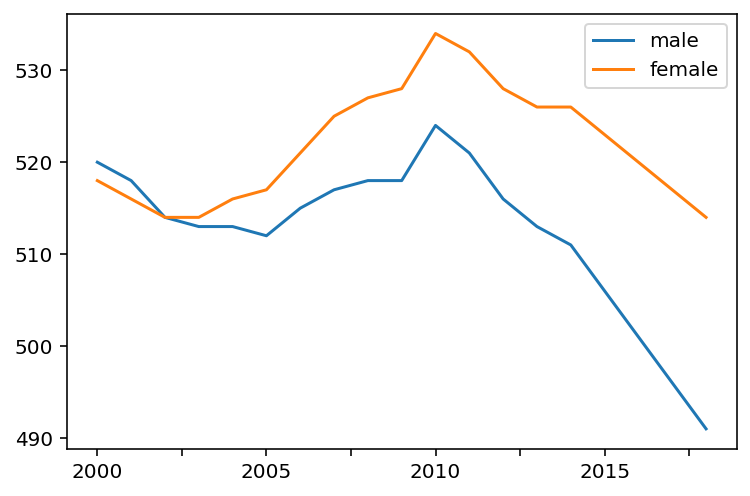

In [ ]:
# 서울 인구 변화
spop.plot(kind='line', y=['male','female'])
plt.show()

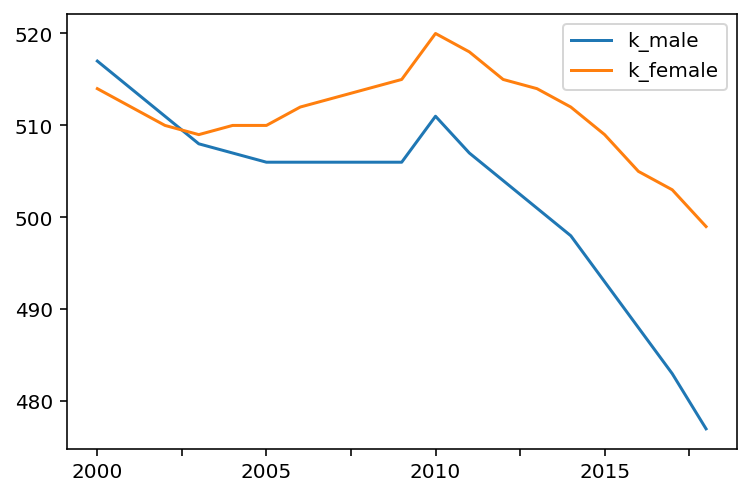

In [ ]:
# 서울 한국인 인구 변화
spop.plot(kind='line', y=['k_male','k_female'])
plt.show()

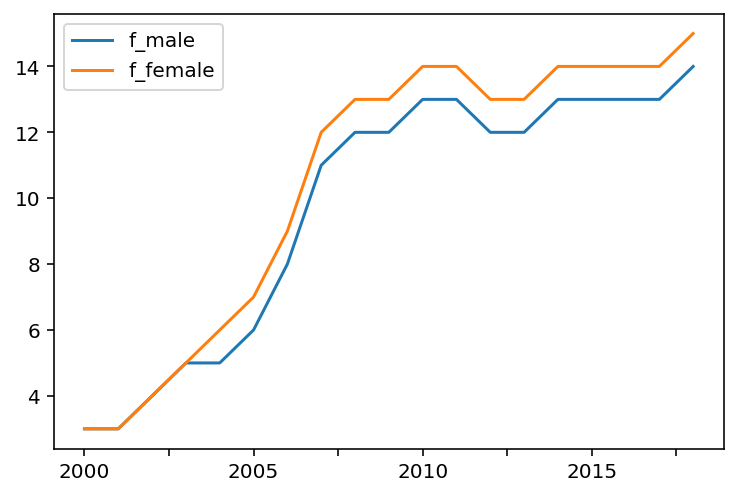

In [ ]:
# 서울 외국인 인구 변화
spop.plot(kind='line', y=['f_male','f_female'])
plt.show()

## [실습2] 데이터프레임 조인

In [ ]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_format='retina'

In [ ]:
# sales 데이터 읽어오기
file_path = 'https://raw.githubusercontent.com/Jangrae/csv/master/sales.csv'
sales = pd.read_csv(file_path)  

# 확인
sales

,OrderID,Seq,OrderDate,ProductID,Qty,Amt,CustomerID
0,1,1,2016-01-02,p1030071,2,7900,c107853
1,2,1,2016-01-02,p1012761,1,1700,c110521
2,2,2,2016-01-02,p1012581,1,1000,c110521
3,2,3,2016-01-02,p1175481,1,1300,c110521
4,2,4,2016-01-02,p1178011,1,8800,c110521
...,...,...,...,...,...,...,...
68834,76,1,2017-03-31,p1201601,1,2100,c302834
68835,77,1,2017-03-31,p1002841,1,10700,c343734
68836,78,1,2017-03-31,p1012761,1,1900,c354639
68837,79,1,2017-03-31,p1005891,1,1950,c394131


In [ ]:
# customer 데이터 읽어오기
file_path = 'https://raw.githubusercontent.com/Jangrae/csv/master/customers.csv'
customer = pd.read_csv(file_path)  

# 확인
customer

,CustomerID,RegisterDate,Address,Gender,BirthYear,Addr1,Addr2
0,c017487,2002-07-31,경기 성남시 중원구 둔촌대로190번길,F,1968,경기도,성남시
1,c017503,2002-07-31,서울 마포구 새터산12길,F,1971,서울특별시,마포구
2,c017517,2002-07-31,경기도 남양주시 와부읍 덕소로,M,1967,경기도,남양주시
3,c017522,2002-07-31,강원도 원주시 단구로,F,1965,강원도,원주시
4,c017526,2002-07-31,경기도 부천시 오정구 소사로730번길,F,1960,경기도,부천시
...,...,...,...,...,...,...,...
2238,c400937,2017-03-12,인천광역시 계양구 주부토로,F,1980,인천광역시,계양구
2239,c401555,2017-03-20,경기도 남양주시 별내면 청학로68번길,F,1981,경기도,남양주시
2240,c401584,2017-03-20,경기도 성남시 분당구 불정로,F,1979,경기도,성남시
2241,c402010,2017-03-25,경기도 성남시 분당구 판교원로82번길,F,1969,경기도,성남시


4) 두 데이터프레임을 CustomerID 열로 inner 조인하여 sales_new 데이터프레임을 만드세요.



In [ ]:
# 조인
sales_new = pd.merge(sales, customer, on='CustomerID', how='inner') 

# 확인
sales_new

,OrderID,Seq,OrderDate,ProductID,Qty,Amt,CustomerID,RegisterDate,Address,Gender,BirthYear,Addr1,Addr2
0,1,1,2016-01-02,p1030071,2,7900,c107853,2008-07-11,경기도 안성시 비룡2길,M,1961,경기도,안성시
1,48,1,2016-01-09,p1097821,3,3000,c107853,2008-07-11,경기도 안성시 비룡2길,M,1961,경기도,안성시
2,48,2,2016-01-09,p1012951,2,6000,c107853,2008-07-11,경기도 안성시 비룡2길,M,1961,경기도,안성시
3,48,3,2016-01-09,p1012811,2,5000,c107853,2008-07-11,경기도 안성시 비룡2길,M,1961,경기도,안성시
4,48,4,2016-01-09,p1005771,1,1850,c107853,2008-07-11,경기도 안성시 비룡2길,M,1961,경기도,안성시
...,...,...,...,...,...,...,...,...,...,...,...,...,...
68834,43,2,2017-03-31,p1284851,1,2750,c400253,2017-03-03,인천광역시 계양구 장제로,F,1956,인천광역시,계양구
68835,43,3,2017-03-31,p1100371,4,1600,c400253,2017-03-03,인천광역시 계양구 장제로,F,1956,인천광역시,계양구
68836,43,4,2017-03-31,p1127201,1,3727,c400253,2017-03-03,인천광역시 계양구 장제로,F,1956,인천광역시,계양구
68837,43,5,2017-03-31,p1036481,2,2100,c400253,2017-03-03,인천광역시 계양구 장제로,F,1956,인천광역시,계양구


5) 아래 목록의 열만 가지도록 sales_new 데이터프레임을 변경하고 열 이름을 소문자로 변경하세요.

- 'OrderDate', 'CustomerID', 'Gender', 'BirthYear', 'Addr1', 'Qty', 'Amt'

In [ ]:
# 필요한 열 추출
sales_new = sales_new[['OrderDate', 'CustomerID', 'Gender', 'BirthYear', 'Addr1', 'Qty', 'Amt']]

# 열 이름 소문자로 변경
sales_new.columns = sales_new.columns.str.lower()

# 확인
sales_new

,orderdate,customerid,gender,birthyear,addr1,qty,amt
0,2016-01-02,c107853,M,1961,경기도,2,7900
1,2016-01-09,c107853,M,1961,경기도,3,3000
2,2016-01-09,c107853,M,1961,경기도,2,6000
3,2016-01-09,c107853,M,1961,경기도,2,5000
4,2016-01-09,c107853,M,1961,경기도,1,1850
...,...,...,...,...,...,...,...
68834,2017-03-31,c400253,F,1956,인천광역시,1,2750
68835,2017-03-31,c400253,F,1956,인천광역시,4,1600
68836,2017-03-31,c400253,F,1956,인천광역시,1,3727
68837,2017-03-31,c400253,F,1956,인천광역시,2,2100


6) groupby() 메소드를 사용해 gender 별 qty, amt 합을 갖는 sales_summry 데이터프레임을 만드세요.

In [ ]:
# 남녀 주문 수량과 금액 합
sales_summary = sales_new.groupby(by='gender', as_index=False)[['qty', 'amt']].sum()

7) 아래 구문을 실행하여 남녀별 주문 수량을 비교하세요.

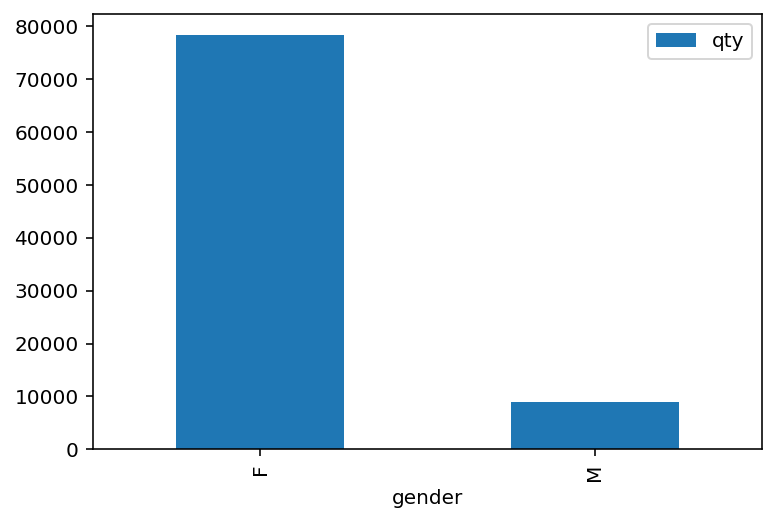

In [ ]:
# 남녀 주문 수량 비교
sales_summary.plot(kind='bar', x='gender', y='qty')
plt.show()

## [실습3] 데이터프레임 롤링 시프트


In [ ]:
# 라이브러리와 파일 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_format='retina'

In [ ]:
# stock 데이터 읽어오기
file_path = 'https://raw.githubusercontent.com/Jangrae/csv/master/stock.csv'
stock = pd.read_csv(file_path, index_col='Date') 
stock.index.name = None

# 확인
stock

,High,Low,Open,Close,Volume,Adj Close
2000-01-03,4.017857,3.631696,3.745536,3.997768,133949200,3.470226
2000-01-04,3.950893,3.613839,3.866071,3.660714,128094400,3.177650
2000-01-05,3.948661,3.678571,3.705357,3.714286,194580400,3.224152
2000-01-06,3.821429,3.392857,3.790179,3.392857,191993200,2.945139
2000-01-07,3.607143,3.410714,3.446429,3.553571,115183600,3.084645
...,...,...,...,...,...,...
2019-12-24,284.890015,282.920013,284.690002,284.269989,12119700,283.596924
2019-12-26,289.980011,284.700012,284.820007,289.910004,23280300,289.223602
2019-12-27,293.970001,288.119995,291.119995,289.799988,36566500,289.113831
2019-12-30,292.690002,285.220001,289.459992,291.519989,36028600,290.829773


In [ ]:

pd.to_datetime(stock.index)

DatetimeIndex(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06',
               '2000-01-07', '2000-01-10', '2000-01-11', '2000-01-12',
               '2000-01-13', '2000-01-14',
               ...
               '2019-12-17', '2019-12-18', '2019-12-19', '2019-12-20',
               '2019-12-23', '2019-12-24', '2019-12-26', '2019-12-27',
               '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', length=5031, freq=None)

In [ ]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5031 entries, 2000-01-03 to 2019-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       5031 non-null   float64
 1   Low        5031 non-null   float64
 2   Open       5031 non-null   float64
 3   Close      5031 non-null   float64
 4   Volume     5031 non-null   int64  
 5   Adj Close  5031 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 275.1+ KB


8) rolling() 메소드를 사용해 기준일 포함 최근 3일 최고 종가(Close)를 갖는 Close_lag3_1 열을 추가하세요.

In [ ]:
# 최근 3일 최고 종가
stock['Close_lag3_1'] = stock['Close'].rolling(3).max()

# 확인
stock

,High,Low,Open,Close,Volume,Adj Close,Close_lag3_1
2000-01-03,4.017857,3.631696,3.745536,3.997768,133949200,3.470226,NaN
2000-01-04,3.950893,3.613839,3.866071,3.660714,128094400,3.177650,NaN
2000-01-05,3.948661,3.678571,3.705357,3.714286,194580400,3.224152,3.997768
2000-01-06,3.821429,3.392857,3.790179,3.392857,191993200,2.945139,3.714286
2000-01-07,3.607143,3.410714,3.446429,3.553571,115183600,3.084645,3.714286
...,...,...,...,...,...,...,...
2019-12-24,284.890015,282.920013,284.690002,284.269989,12119700,283.596924,284.269989
2019-12-26,289.980011,284.700012,284.820007,289.910004,23280300,289.223602,289.910004
2019-12-27,293.970001,288.119995,291.119995,289.799988,36566500,289.113831,289.910004
2019-12-30,292.690002,285.220001,289.459992,291.519989,36028600,290.829773,291.519989


9) rolling(), shift() 메소드를 사용해 기준일을 포함하지 않은 최근 3일의 최고 종가를 갖는 Close_lag3_2 열을 추가하세요.

In [ ]:
# 과거 3일의 최고 종가
stock['Close_lag3_2'] = stock['Close'].rolling(3).max().shift(1)

# 확인
stock

,High,Low,Open,Close,Volume,Adj Close,Close_lag3_1,Close_lag3_2
2000-01-03,4.017857,3.631696,3.745536,3.997768,133949200,3.470226,NaN,NaN
2000-01-04,3.950893,3.613839,3.866071,3.660714,128094400,3.177650,NaN,NaN
2000-01-05,3.948661,3.678571,3.705357,3.714286,194580400,3.224152,3.997768,NaN
2000-01-06,3.821429,3.392857,3.790179,3.392857,191993200,2.945139,3.714286,3.997768
2000-01-07,3.607143,3.410714,3.446429,3.553571,115183600,3.084645,3.714286,3.714286
...,...,...,...,...,...,...,...,...
2019-12-24,284.890015,282.920013,284.690002,284.269989,12119700,283.596924,284.269989,284.000000
2019-12-26,289.980011,284.700012,284.820007,289.910004,23280300,289.223602,289.910004,284.269989
2019-12-27,293.970001,288.119995,291.119995,289.799988,36566500,289.113831,289.910004,289.910004
2019-12-30,292.690002,285.220001,289.459992,291.519989,36028600,290.829773,291.519989,289.910004


10) 기준일을 포함하지 않은 최근 7일의 최고 종가를 갖는 Close_lag7 열을 추가하세요.

In [ ]:
# 과거 7일 최고 종가
stock['Close_lag7'] = stock['Close'].rolling(7).max().shift(1)

# 확인
stock

,High,Low,Open,Close,Volume,Adj Close,Close_lag3_1,Close_lag3_2,Close_lag7
2000-01-03,4.017857,3.631696,3.745536,3.997768,133949200,3.470226,NaN,NaN,NaN
2000-01-04,3.950893,3.613839,3.866071,3.660714,128094400,3.177650,NaN,NaN,NaN
2000-01-05,3.948661,3.678571,3.705357,3.714286,194580400,3.224152,3.997768,NaN,NaN
2000-01-06,3.821429,3.392857,3.790179,3.392857,191993200,2.945139,3.714286,3.997768,NaN
2000-01-07,3.607143,3.410714,3.446429,3.553571,115183600,3.084645,3.714286,3.714286,NaN
...,...,...,...,...,...,...,...,...,...
2019-12-24,284.890015,282.920013,284.690002,284.269989,12119700,283.596924,284.269989,284.000000,284.000000
2019-12-26,289.980011,284.700012,284.820007,289.910004,23280300,289.223602,289.910004,284.269989,284.269989
2019-12-27,293.970001,288.119995,291.119995,289.799988,36566500,289.113831,289.910004,289.910004,289.910004
2019-12-30,292.690002,285.220001,289.459992,291.519989,36028600,290.829773,291.519989,289.910004,289.910004


11) stock 데이터프레임에서 2019년 9월 ~ 12월 데이터만 가져와 stock2019 데이터프레임을 만드세요.

In [ ]:
# 2019년 9월 ~ 12월 데이터 복사
stock2019 = stock.loc['2019-09-01':'2019-12-31']

# 확인
stock2019

,High,Low,Open,Close,Volume,Adj Close,Close_lag3_1,Close_lag3_2,Close_lag7
2019-09-03,206.979996,204.220001,206.429993,205.699997,20023000,204.598694,209.009995,209.009995,212.460007
2019-09-04,209.479996,207.320007,208.389999,209.190002,19188100,208.070038,209.190002,209.009995,209.009995
2019-09-05,213.970001,211.509994,212.000000,213.279999,23913700,212.138123,213.279999,209.190002,209.190002
2019-09-06,214.419998,212.509994,214.050003,213.259994,19362300,212.118225,213.279999,213.279999,213.279999
2019-09-09,216.440002,211.070007,214.839996,214.169998,27309400,213.023361,214.169998,213.279999,213.279999
...,...,...,...,...,...,...,...,...,...
2019-12-24,284.890015,282.920013,284.690002,284.269989,12119700,283.596924,284.269989,284.000000,284.000000
2019-12-26,289.980011,284.700012,284.820007,289.910004,23280300,289.223602,289.910004,284.269989,284.269989
2019-12-27,293.970001,288.119995,291.119995,289.799988,36566500,289.113831,289.910004,289.910004,289.910004
2019-12-30,292.690002,285.220001,289.459992,291.519989,36028600,290.829773,291.519989,289.910004,289.910004


12) 아래 구문을 실행해 시각화된 결과를 확인하세요.

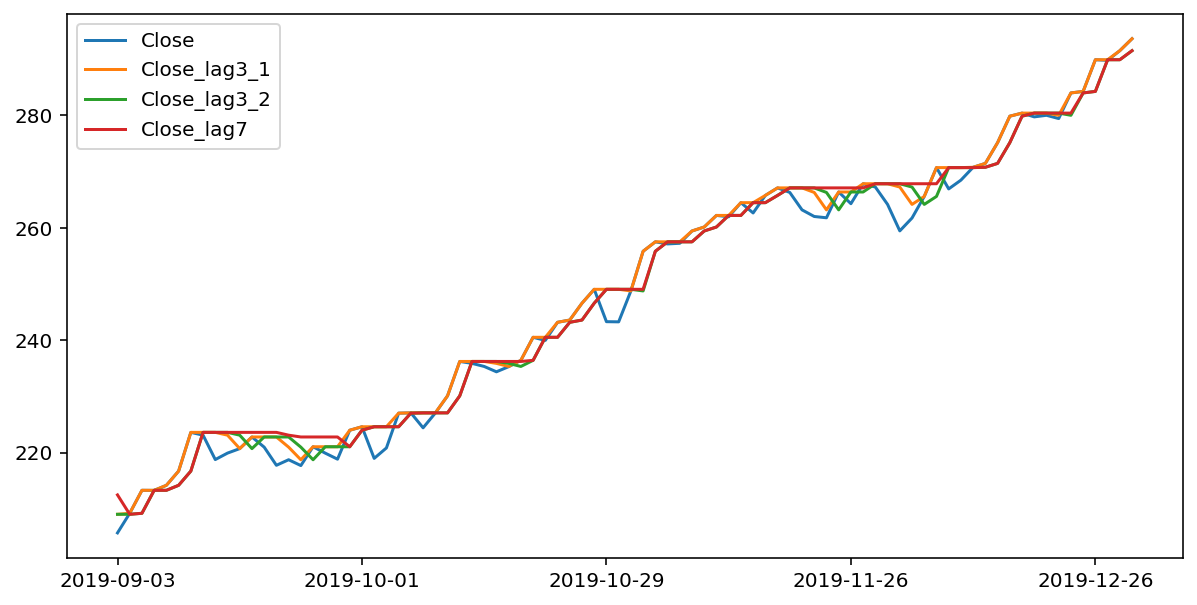

In [ ]:
stock2019.plot(y=['Close', 'Close_lag3_1', 'Close_lag3_2', 'Close_lag7'], figsize=(10, 5))
plt.show()

<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/end.png' width=300/></center>